In [18]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import seaborn as sn

## loading and preprocessing of data 

In [19]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [20]:
len(X_train)

60000

In [21]:
len(X_test)

10000

In [22]:
X_train[(x:=random.randint(0, len(X_train) - 1))]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  19,
         87, 161, 161, 254, 203, 161,  69,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  47, 138, 237,
        253, 253, 253, 207, 249, 253, 211,  68,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [23]:
X_train = X_train / 255 # scaling dataset form (0, 255) -> (0, 1)
X_test = X_test / 255

In [24]:
X_train[x]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

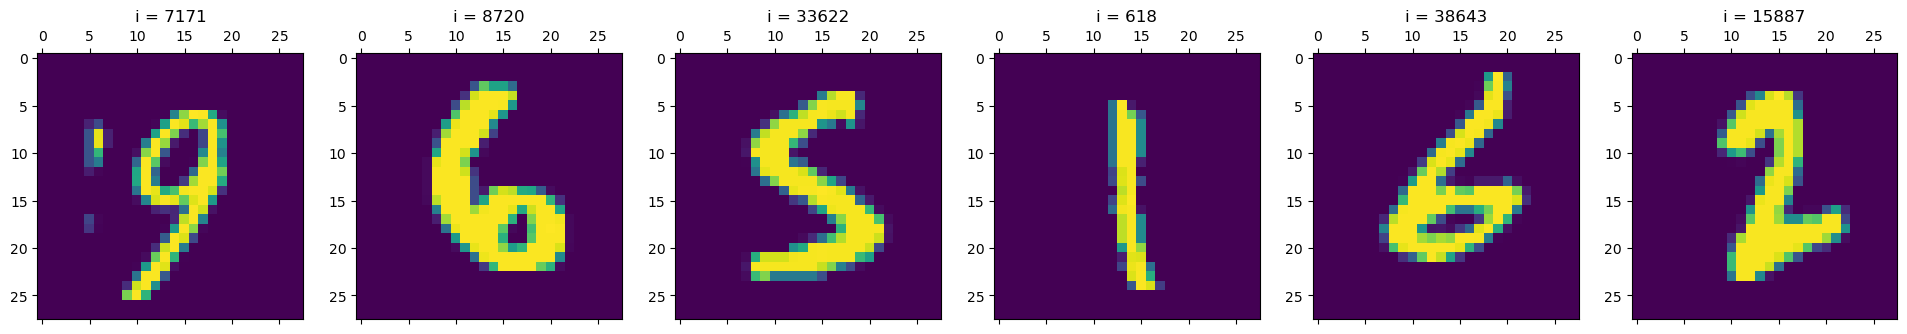

In [25]:
fig = plt.figure(figsize=(24, 4)) 
gs = fig.add_gridspec(1, 6)  
for a in range(6):
    ax = fig.add_subplot(gs[0,a])
    ax.set_title('i = ' + str(i := random.randint(0, len(X_train) - 1)))
    ax.matshow(X_train[i])

In [26]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [27]:
X_train.shape

(60000, 28, 28)

## Model_2 architechture and training

In [28]:
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # this layers take the 2d array input and converts it 1d array
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),
])

model_2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model_2.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2761 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1248 - accuracy: 0.9626
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0888 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0682 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0532 - accuracy: 0.9838


In [29]:
model_2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0874 - accuracy: 0.9740


[0.08737396448850632, 0.9739999771118164]

In [30]:
y_predicted = model_2.predict(X_test)
y_predicted.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [31]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Output (7750) = [5.46799129e-07 8.25891213e-04 2.33085111e-01 9.99999762e-01
 3.12846415e-09 3.58733356e-01 4.02956054e-12 6.80400190e-05
 3.47986482e-02 1.09041594e-01]
Predicted Number = 3 with prediction % = 99.99997615814209


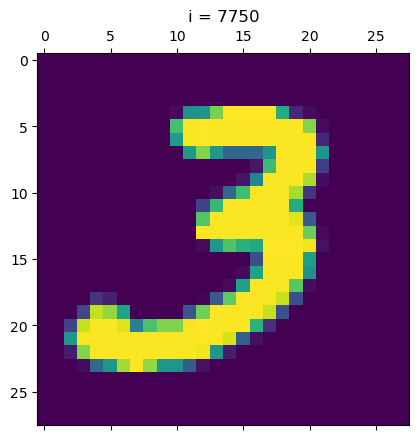

In [32]:
plt.matshow(X_test[(i := random.randint(0, len(X_test) - 1))])
plt.title('i = ' + str(i))
print('Output (' + str(i) + ') = ' + str(y_predicted[i]))
predictedNum, predictionPercentage = np.argmax(y_predicted[i]), max(y_predicted[i]) * 100
print(f'Predicted Number = {predictedNum} with prediction % = {predictionPercentage}')

In [33]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    1,    0,    1,    0,    1,    3,    3,    1,    0],
       [   0, 1123,    2,    1,    0,    1,    5,    1,    2,    0],
       [   5,    2, 1003,    1,    3,    0,    7,    7,    3,    1],
       [   0,    0,    2,  982,    0,    5,    1,    6,    3,   11],
       [   0,    0,    2,    0,  934,    1,   18,    2,    1,   24],
       [   3,    0,    0,   12,    1,  865,   10,    0,    0,    1],
       [   1,    2,    2,    1,    0,    2,  950,    0,    0,    0],
       [   0,    4,    9,    1,    0,    0,    0, 1004,    2,    8],
       [   4,    0,    9,    7,    4,    5,    9,    8,  921,    7],
       [   2,    2,    1,    4,    2,    4,    1,    4,    1,  988]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

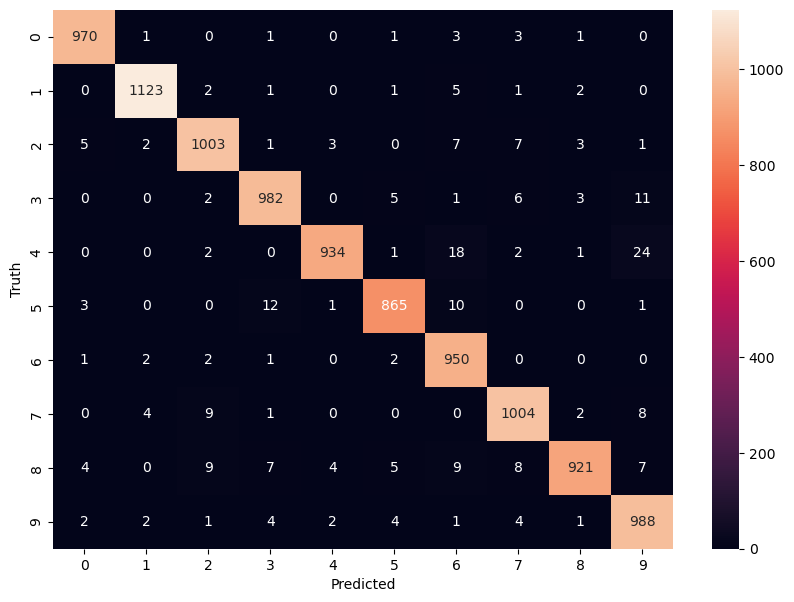

In [34]:
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')